<a href="https://colab.research.google.com/github/HoarfrostRaven/Apprentissages-Automatiques-Appliques/blob/main/ReseauDeNeurones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# MNIST Data

In [ ]:
# Prepare MNIST data.

num_classes = 10
num_features = 28*28


from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Numero:5')

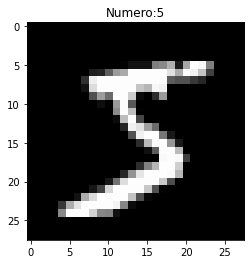

In [ ]:
plt.imshow(X_train[0,:], cmap="gray")
plt.title(f"Numero:{Y_train[0]}")

Question 1 : En réutilisant le code ci-dessus, lister tous les numéros disponibles et les afficher


In [ ]:
# Convert to float32.
x_train, x_test = np.array(X_train, np.float32), np.array(X_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [ ]:
x_train[0,:].shape

(784,)

In [ ]:
# Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
def cross_entropy_loss(x, y):
    # Convert labels to int 64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Optimization process.
def run_optimization(x, y, nnmodel):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = nnmodel(x, is_training=True)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)

    # Variables to update, i.e. trainable variables.
    trainable_variables = nnmodel.trainable_variables

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)

    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))



# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100


# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:


# Use tf.data API to shuffle and batch data.
batch_size = 256

train_data = tf.data.Dataset.from_tensor_slices((x_train, Y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)




#### I.MLP

In [ ]:


# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.






# Create TF Model.
class NeuralNet(Model):
    # Set layers.
    def __init__(self):
        super(NeuralNet, self).__init__()
        # First fully-connected hidden layer.
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
        # First fully-connected hidden layer.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
        # Second fully-connecter hidden layer.
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x



# Build neural network model.
neural_net = NeuralNet()




# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y, neural_net)

    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 100, loss: 0.486453, accuracy: 0.851562
step: 200, loss: 0.307259, accuracy: 0.898438
step: 300, loss: 0.348731, accuracy: 0.898438
step: 400, loss: 0.151561, accuracy: 0.968750
step: 500, loss: 0.160793, accuracy: 0.968750
step: 600, loss: 0.177162, accuracy: 0.957031
step: 700, loss: 0.202057, accuracy: 0.945312
step: 800, loss: 0.127772, accuracy: 0.964844
step: 900, loss: 0.213681, accuracy: 0.929688
step: 1000, loss: 0.235038, accuracy: 0.941406
step: 1100, loss: 0.135748, accuracy: 0.972656
step: 1200, loss: 0.109042, accuracy: 0.964844
step: 1300, loss: 0.095806, accuracy: 0.964844
step: 1400, loss: 0.175273, accuracy: 0.945312
step: 1500, loss: 0.101549, accuracy: 0.972656
step: 1600, loss: 0.084277, accuracy: 0.968750
step: 1700, loss: 0.181019, accuracy: 0.933594
step: 1800, loss: 0.066869, accuracy: 0.988281
step: 1900, loss: 0.088551, accuracy: 0.968750
step: 2000, loss: 0.073737, accuracy: 0.984375


Question 2 : Le code ci-dessus optimise un réseau de neurones données par défaut. Générer différents paramètres (nomnbre de neurones couche 1 et 2) et déterminer le meilleur de ces paramètre.

Question 3: Genéraliser la classe neural net pour avoir un nombre de hidden layer paramétrisable.

Question 4: Faire de la classification / regression sur les jeux de données déjà étudié en utilisant les réseaux de neurones avec le code ci-dessus


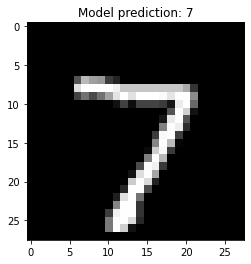

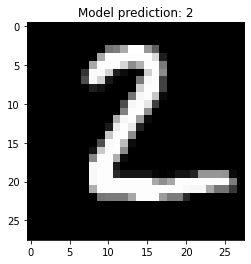

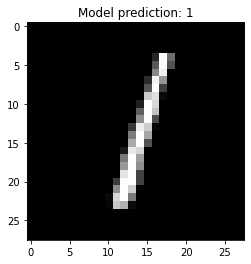

In [ ]:
# Predict 3 images from validation set.
n_images = 3
test_images = x_test[:n_images]
predictions = neural_net(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.title("Model prediction: %i" % np.argmax(predictions.numpy()[i]))
    plt.show()


In [ ]:
pred = neural_net(x_test, is_training=False)

score = [float(u[v]) for u, v in zip(np.array(pred), Y_test)]
m = np.max(np.array(pred),axis=1)

In [ ]:
m

array([0.9974406 , 0.98993886, 0.98339003, ..., 0.99929273, 0.99926907,
       0.9999604 ], dtype=float32)

In [ ]:
scoring = pd.DataFrame({"score":score})
scoring = scoring.sort_values("score")

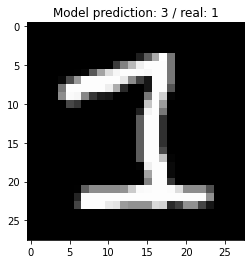

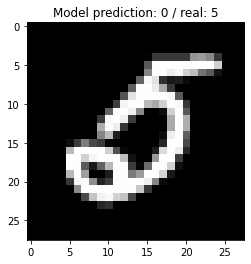

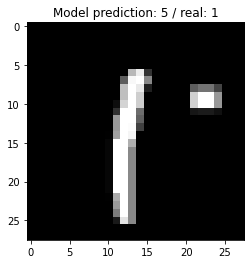

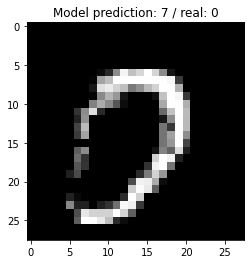

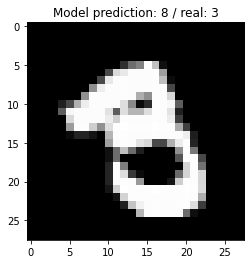

In [ ]:
# Check 3 worst predictions
n_images = 5
test_images = x_test[scoring.index[:n_images]]
real = Y_test[scoring.index[:n_images]]
predictions = neural_net(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.title(f"Model prediction: {np.argmax(predictions.numpy()[i])} / real: {real[i]}")
    plt.show()

#### II.CNN

Question 5 : Reprendre les questions précédentes avec le CNN défini ci-dessous

In [ ]:
# Create TF Model.
class ConvNet(Model):
    # Set layers.
    def __init__(self):
        super(ConvNet, self).__init__()
        # Convolution Layer with 32 filters and a kernel size of 5.
        self.conv1 = layers.Conv2D(32, kernel_size=5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with kernel size of 2 and strides of 2.
        self.maxpool1 = layers.MaxPool2D(2, strides=2)

        # Convolution Layer with 64 filters and a kernel size of 3.
        self.conv2 = layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with kernel size of 2 and strides of 2.
        self.maxpool2 = layers.MaxPool2D(2, strides=2)

        # Flatten the data to a 1-D vector for the fully connected layer.
        self.flatten = layers.Flatten()

        # Fully connected layer.
        self.fc1 = layers.Dense(1024)
        # Apply Dropout (if is_training is False, dropout is not applied).
        self.dropout = layers.Dropout(rate=0.5)

        # Output layer, class prediction.
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = tf.reshape(x, [-1, 28, 28, 1])
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout(x, training=is_training)
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build neural network model.
conv_net = ConvNet()

In [ ]:
# Convert to float32.
xc_train, xc_test = np.array(X_train, np.float32), np.array(X_test, np.float32)
# Normalize images value from [0, 255] to [0, 1].
xc_train, xc_test = xc_train / 255., xc_test / 255.



# Use tf.data API to shuffle and batch data.
train_datac = tf.data.Dataset.from_tensor_slices((xc_train, Y_train))
train_datac = train_datac.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [ ]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_datac.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y, conv_net)

    if step % display_step == 0:
        pred = conv_net(batch_x)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 100, loss: 1.562604, accuracy: 0.949219
step: 200, loss: 1.529353, accuracy: 0.957031
step: 300, loss: 1.510023, accuracy: 0.976562
step: 400, loss: 1.516743, accuracy: 0.964844
step: 500, loss: 1.493529, accuracy: 0.980469
step: 600, loss: 1.488026, accuracy: 0.988281
step: 700, loss: 1.492182, accuracy: 0.972656
step: 800, loss: 1.479293, accuracy: 0.992188
step: 900, loss: 1.484520, accuracy: 0.988281
step: 1000, loss: 1.481455, accuracy: 0.996094
step: 1100, loss: 1.480166, accuracy: 0.988281
step: 1200, loss: 1.478563, accuracy: 0.996094
step: 1300, loss: 1.478578, accuracy: 0.996094
step: 1400, loss: 1.481069, accuracy: 0.984375
step: 1500, loss: 1.479861, accuracy: 0.996094
step: 1600, loss: 1.485790, accuracy: 0.988281
step: 1700, loss: 1.472342, accuracy: 1.000000
step: 1800, loss: 1.476607, accuracy: 0.992188
step: 1900, loss: 1.470992, accuracy: 1.000000
step: 2000, loss: 1.478075, accuracy: 0.992188


In [ ]:
predc= conv_net(xc_test, is_training=False)

scorec = [float(u[v]) for u, v in zip(np.array(predc), Y_test)]
scoringc = pd.DataFrame({"score":scorec})
scoringc = scoring.sort_values("score")

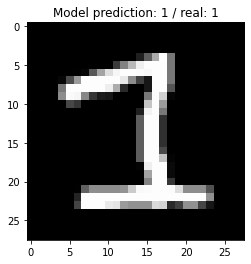

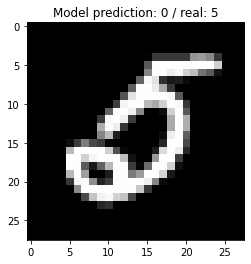

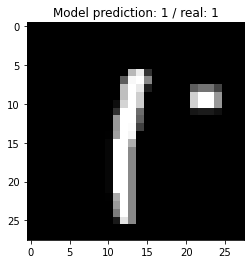

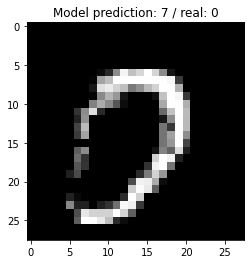

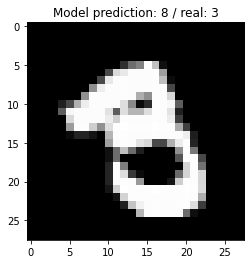

In [ ]:
# Check 3 worst predictions
n_images = 5
test_imagesc = xc_test[scoringc.index[:n_images]]
real = Y_test[scoringc.index[:n_images]]
predictionsc = conv_net(test_imagesc)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_imagesc[i], [28, 28]), cmap='gray')
    plt.title(f"Model prediction: {np.argmax(predictionsc.numpy()[i])} / real: {real[i]}")
    plt.show()